### Sistemas Operacionais

* Aluno: Marcos Paulo de Carvalho Lopes

### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria aora 
        self.chegada = tempoChegada
        self.atual = 0
        self.exec = 0

    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
    

class escalonador_fifo(object): # Protótipo de escalonador de exemplo
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero

    def pronto(self,Processo): # implemente aqui o que escalonador faz quando surge um novo processo pronto
        if(Processo not in self.prontos):
            self.prontos.append(Processo)
        
        
    def proximo(self):
        for i in range(len(self.prontos)):
            if self.prontos[i].tam > 0:
                return self.prontos[i]
            
class escalonador_sjf(object): # Protótipo de escalonador de exemplo
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        self.iter = []
        
    
    def pronto(self,Processo): # implemente aqui o que escalonador faz quando surge um novo processo pronto
        if(Processo not in self.prontos):
            self.prontos.append(Processo)
        
        
    def proximo(self):
        if len(self.prontos) > 0:
            self.prontos.sort(key = lambda processo: processo.tam)
            self.iter.append(self.prontos[0])
            self.prontos = self.prontos[1:]
        for i in range(len(self.iter)):
            if self.iter[i].tam > 0:
                return self.iter[i]


class escalonador_stcf(object): # Protótipo de escalonador de exemplo
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        
    
    def pronto(self,Processo): # implemente aqui o que escalonador faz quando surge um novo processo pronto
        if(Processo not in self.prontos):
            self.prontos.append(Processo)
        
        
    def proximo(self):
        self.prontos.sort(key = lambda processo: processo.tam)
        for i in range(len(self.prontos)):
            if self.prontos[i].tam > 0:
                return self.prontos[i]
            

class escalonador_robin(object): # Protótipo de escalonador de exemplo
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que cheam ao tempo zero
        
    
    def pronto(self,Processo): # implemente aqui o que escalonador faz quando surge um novo processo pronto
        if(Processo not in self.prontos):
            self.prontos.append(Processo)
        
        
    def proximo(self):
        for i in range(len(self.prontos)):
            if self.prontos[i].tam == 0:
                self.prontos[i].atual = 1
            if self.prontos[i].atual == 0 and self.prontos[i].tam > 0:
                self.prontos[i].atual = 1
                return self.prontos[i]
            
        if len([i for i in self.prontos if i.atual == 1]) == len(self.prontos):
            for i in range(len(self.prontos)):
                self.prontos[i].atual = 0
            for i in range(len(self.prontos)):
                if self.prontos[i].tam > 0:
                    self.prontos[i].atual = 1
                    return self.prontos[i]


Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [2]:
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([10,20,30,40])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos
    



Na célula abaixo, temos uma simulação do funcionamento de um escalonador de processos. As duas configurações importantes aqui são o valor do quantum padrão (que pode ser dinamico em algoritmos mais complexos, e quantos timeslices um processo que faz e/s passa bloqueado.

Percebam que na terceira linha é instanciado o escalonador (neste caso, um round_robin). Isto foi feito assim para ser simples trocar o escalonador e repetir a simulação, bastando criar uma classe com os métodos pronto, proximo e construtor e alterar esta linha.

In [3]:
# FIFO

quantum = 1
tempoBloq = 1

escalonador = escalonador_fifo(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
tempoE = []
tempoR = []
indice = 0
Iter = 0
teste = Processo('X',0,1,0,2)

random.seed(0)

print("FIFO")

while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if len(tempoE) == 0:
            tempoE.append(rodou)
            tempoR.append(indice)
        else:
            tempoE.append(rodou+tempoE[indice])
            tempoR.append(tempoE[indice])
            indice += 1
            
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
        
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
        
    #Adicionando um processo no meio do programa para teste, só descomentar as 4 linhas seguintes.

    #Iter+=1
    #if teste.chegada == Iter:
        #escalonador.pronto(teste)
        #total+=teste.tam



print("Tempo médio de execução:",sum(tempoE)/len(tempoE))
print("Tempo médio de resposta:",sum(tempoR)/len(tempoR))


    

FIFO
A  rodou por  10  timeslice, faltam  0
B  rodou por  20  timeslice, faltam  0
C  rodou por  30  timeslice, faltam  0
D  rodou por  40  timeslice, faltam  0
Tempo médio de execução: 50.0
Tempo médio de resposta: 25.0


No handles with labels found to put in legend.


SJF
A  rodou por  10  timeslice, faltam  0
B  rodou por  20  timeslice, faltam  0
C  rodou por  30  timeslice, faltam  0
D  rodou por  40  timeslice, faltam  0
Tempo médio de execução: 50.0
Tempo médio de resposta: 25.0


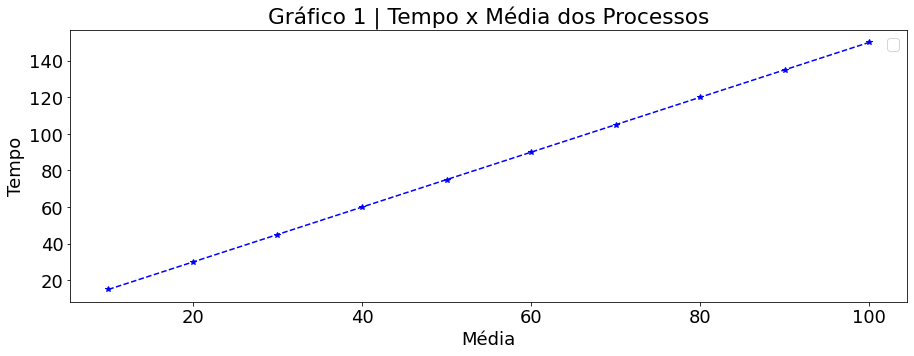

In [4]:
# SJF

nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0,] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([10,20,30,40])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos

quantum = 1
tempoBloq = 1

escalonador = escalonador_sjf(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
tempoE = []
tempoR = []
graficoT = [10,20,30,40,50,60,70,80,90,100]
graficoR = [15,30,45,60,75,90,105,120,135,150]
indice = 0
Iter = 0
teste = Processo('X',0,1,0,2)

random.seed(0)

print("SJF")

while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if len(tempoE) == 0:
            tempoE.append(rodou)
            tempoR.append(indice)
        else:
            tempoE.append(rodou+tempoE[indice])
            tempoR.append(tempoE[indice])
            indice += 1
            
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
        
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
        
    #Adicionando um processo no meio do programa para teste, só descomentar as 4 linhas seguintes. 

    #Iter+=1
    #if teste.chegada == Iter:
        #escalonador.pronto(teste)
        #total+=teste.tam
        
# Tempos: 15,30,45,60,75,90,105,120,135,150

print("Tempo médio de execução:",sum(tempoE)/len(tempoE))
print("Tempo médio de resposta:",sum(tempoR)/len(tempoR))

plt.figure(figsize=(15,5))
plt.rc('font',size=18)
plt.plot(graficoT,graficoR,'*--',color='b')
plt.title("Gráfico 1 | Tempo x Média dos Processos")
plt.xlabel("Média")
plt.ylabel("Tempo")
plt.rc('font',size=16)

plt.legend()
plt.savefig('grafico1.png', format='png')
plt.show()



No handles with labels found to put in legend.


Robin
A  rodou por  2  timeslice, faltam  18
B  rodou por  2  timeslice, faltam  18
C  rodou por  2  timeslice, faltam  18
D  rodou por  2  timeslice, faltam  18
A  rodou por  2  timeslice, faltam  16
B  rodou por  2  timeslice, faltam  16
C  rodou por  2  timeslice, faltam  16
D  rodou por  2  timeslice, faltam  16
A  rodou por  2  timeslice, faltam  14
B  rodou por  2  timeslice, faltam  14
C  rodou por  2  timeslice, faltam  14
D  rodou por  2  timeslice, faltam  14
A  rodou por  2  timeslice, faltam  12
B  rodou por  2  timeslice, faltam  12
C  rodou por  2  timeslice, faltam  12
D  rodou por  2  timeslice, faltam  12
A  rodou por  2  timeslice, faltam  10
B  rodou por  2  timeslice, faltam  10
C  rodou por  2  timeslice, faltam  10
D  rodou por  2  timeslice, faltam  10
A  rodou por  2  timeslice, faltam  8
B  rodou por  2  timeslice, faltam  8
C  rodou por  2  timeslice, faltam  8
D  rodou por  2  timeslice, faltam  8
A  rodou por  2  timeslice, faltam  6
B  rodou por  2  timesli

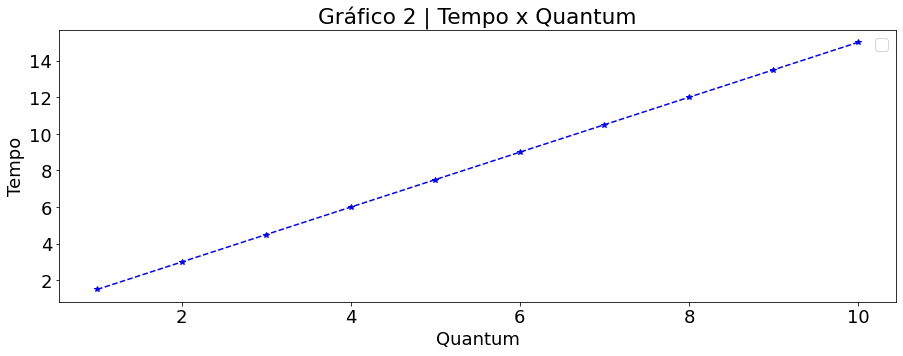

In [5]:
# Robin

nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([20,20,20,20])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos

quantum = 2
tempoBloq = 1

escalonador = escalonador_robin(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
tempoE = []
tempoR = []
graficoT = [1,2,3,4,5,6,7,8,9,10]
#quantum = graficoT[9]
graficoR = [1.5,3.0,4.5,6.0,7.5,9.0,10.5,12.0,13.5,15]
indice = 0
Iter = 0
teste = Processo('X',0,1,0,2)

random.seed(0)

print("Robin")

while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if len(tempoE) == 0:
            tempoE.append(rodou)
            tempoR.append(indice)
        else:
            tempoE.append(rodou+tempoE[indice])
            tempoR.append(tempoE[indice])
            indice += 1
            
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
        
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
        
    #Adicionando um processo no meio do programa para teste, só descomentar as 4 linhas seguintes. 
    
    #Iter += 1
    #if teste.chegada == Iter:
        #escalonador.pronto(teste)
        #total+=teste.tam
# Tempo de Resposta: 1.5,3.0,4.5,6.0,7.5,9.0,10.5,12.0,13.5,15

print("Tempo Médio de Resposta:",np.mean([quantum * i for i in range(len(escalonador.prontos))]))

plt.figure(figsize=(15,5))
plt.rc('font',size=18)
plt.plot(graficoT,graficoR,'*--',color='b')
plt.title("Gráfico 2 | Tempo x Quantum")
plt.xlabel("Quantum")
plt.ylabel("Tempo")
plt.rc('font',size=16)

plt.legend()
plt.savefig('grafico2.png', format='png')
plt.show()

In [6]:
# STCF

nprocs = 6
nomes = ['A','B','C','D','E','F']
chanceio = [0,0,0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([5,3,3,3,1,4])


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0)) #cria uma lista procs de Processos

quantum = 1
tempoBloq = 1

escalonador = escalonador_stcf(procs) #troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0
tempoE = []
tempoR = []
indice = 0
Iter = 0
teste = Processo('X',0,1,0,2)

random.seed(0)

print("STCF")

while total>0:
    p = escalonador.proximo()
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if len(tempoE) == 0:
            tempoE.append(rodou)
            tempoR.append(indice)
        else:
            tempoE.append(rodou+tempoE[indice])
            tempoR.append(tempoE[indice])
            indice += 1
            
        if(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
        
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
        
    #Adicionando um processo no meio do programa para teste, só descomentar as 4 linhas seguintes. 
    
    Iter += 1
    if teste.chegada == Iter:
        escalonador.pronto(teste)
        total+=teste.tam


STCF
E  rodou por  1  timeslice, faltam  0
B  rodou por  1  timeslice, faltam  2
X  rodou por  1  timeslice, faltam  0
B  rodou por  1  timeslice, faltam  1
B  rodou por  1  timeslice, faltam  0
C  rodou por  1  timeslice, faltam  2
C  rodou por  1  timeslice, faltam  1
C  rodou por  1  timeslice, faltam  0
D  rodou por  1  timeslice, faltam  2
D  rodou por  1  timeslice, faltam  1
D  rodou por  1  timeslice, faltam  0
F  rodou por  1  timeslice, faltam  3
F  rodou por  1  timeslice, faltam  2
F  rodou por  1  timeslice, faltam  1
F  rodou por  1  timeslice, faltam  0
A  rodou por  1  timeslice, faltam  4
A  rodou por  1  timeslice, faltam  3
A  rodou por  1  timeslice, faltam  2
A  rodou por  1  timeslice, faltam  1
A  rodou por  1  timeslice, faltam  0


### Laboratório: ###


1 - Altere o simulador acima para calcular o tempo de execucao medio e tempo de resposta 

2 - Implemente o escalonador por FIFO e SJF e verifique seus tempos de execução e espera.

3 - Faça em outra célula uma implementação do STCF e Round Robin, alterando o p.roda() para receber o quantum


Na segunda feira (15) haverá um questionário no ColabWeb onde você deverá utilizar suas implementações para responder às perguntas. Na terça de manhã farei uma breve conferência para tirar dúvidas.